In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
#to be import
df = pd.read_csv("sorting_results.csv")
df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons,IsSorted
0,1,1000,MergeSort,2,8729,True
1,1,1000,HybridMergeSort,0,8710,True
2,1,2000,MergeSort,1,19403,True
3,1,2000,HybridMergeSort,0,19410,True
4,1,3000,MergeSort,1,30918,True
...,...,...,...,...,...,...
1439,950,5000000,HybridMergeSort,2283,832200336,True
1440,950,7500000,MergeSort,1604,161906556,True
1441,950,7500000,HybridMergeSort,4509,1820460954,True
1442,950,10000000,MergeSort,2254,220099491,True


In [3]:
hybrid_df = df[df['Algorithm'] == 'HybridMergeSort']
hybrid_df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons,IsSorted
1,1,1000,HybridMergeSort,0,8710,True
3,1,2000,HybridMergeSort,0,19410,True
5,1,3000,HybridMergeSort,1,30890,True
7,1,4000,HybridMergeSort,1,42841,True
9,1,5000,HybridMergeSort,2,55287,True
...,...,...,...,...,...,...
1435,950,2000000,HybridMergeSort,749,269661495,True
1437,950,2500000,HybridMergeSort,1129,413392010,True
1439,950,5000000,HybridMergeSort,2283,832200336,True
1441,950,7500000,HybridMergeSort,4509,1820460954,True


In [4]:
merge_df = df[df['Algorithm'] == 'MergeSort']
merge_df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons,IsSorted
0,1,1000,MergeSort,2,8729,True
2,1,2000,MergeSort,1,19403,True
4,1,3000,MergeSort,1,30918,True
6,1,4000,MergeSort,1,42867,True
8,1,5000,MergeSort,2,55335,True
...,...,...,...,...,...,...
1434,950,2000000,MergeSort,424,39348690,True
1436,950,2500000,MergeSort,523,50025596,True
1438,950,5000000,MergeSort,1133,105049720,True
1440,950,7500000,MergeSort,1604,161906556,True


In [5]:
print("Threshold: " , df['Threshold'].unique())
print("Number of Different Threshold: ",df['Threshold'].nunique())
print("Array Size: " , df['Array Size'].unique())
print("Number of Different Array Size: ",df['Array Size'].nunique())

Threshold:  [  1   5   8  10  15  16  20  25  30  32  35  40  45  50  55  60  65  70
  75  80  85  90  95 100 124 200 250 300 350 400 450 500 550 650 750 850
 900 950]
Number of Different Threshold:  38
Array Size:  [    1000     2000     3000     4000     5000    10000    20000    30000
    40000    50000   100000   500000  1000000  1500000  2000000  2500000
  5000000  7500000 10000000]
Number of Different Array Size:  19


## ci. (Fixed threshold) Key comparison vs Array size
With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity

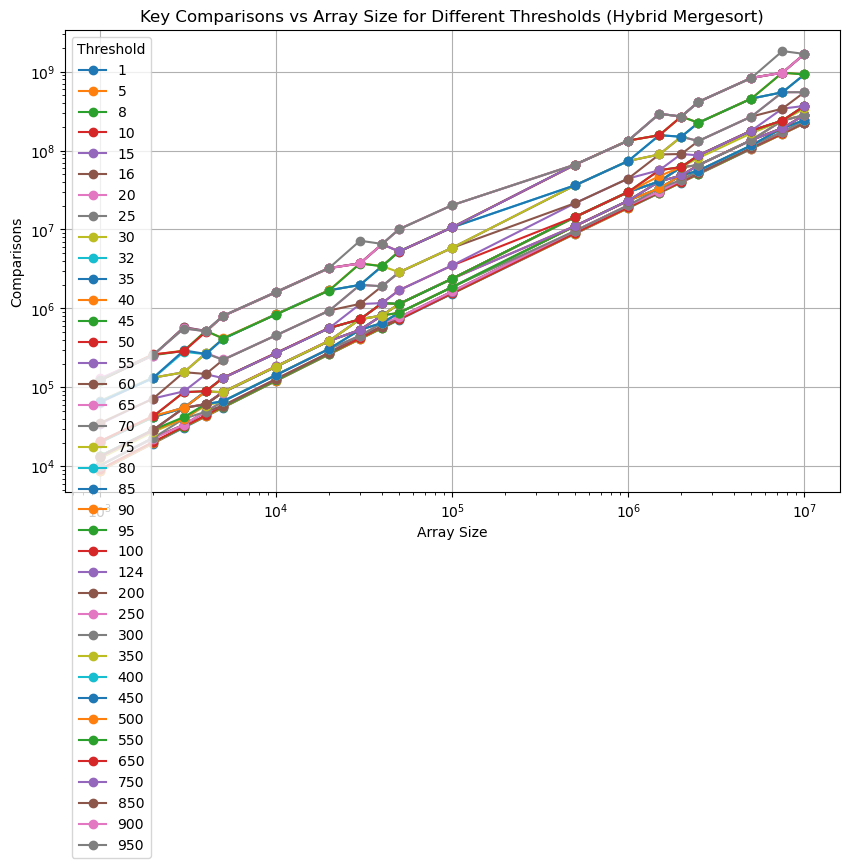

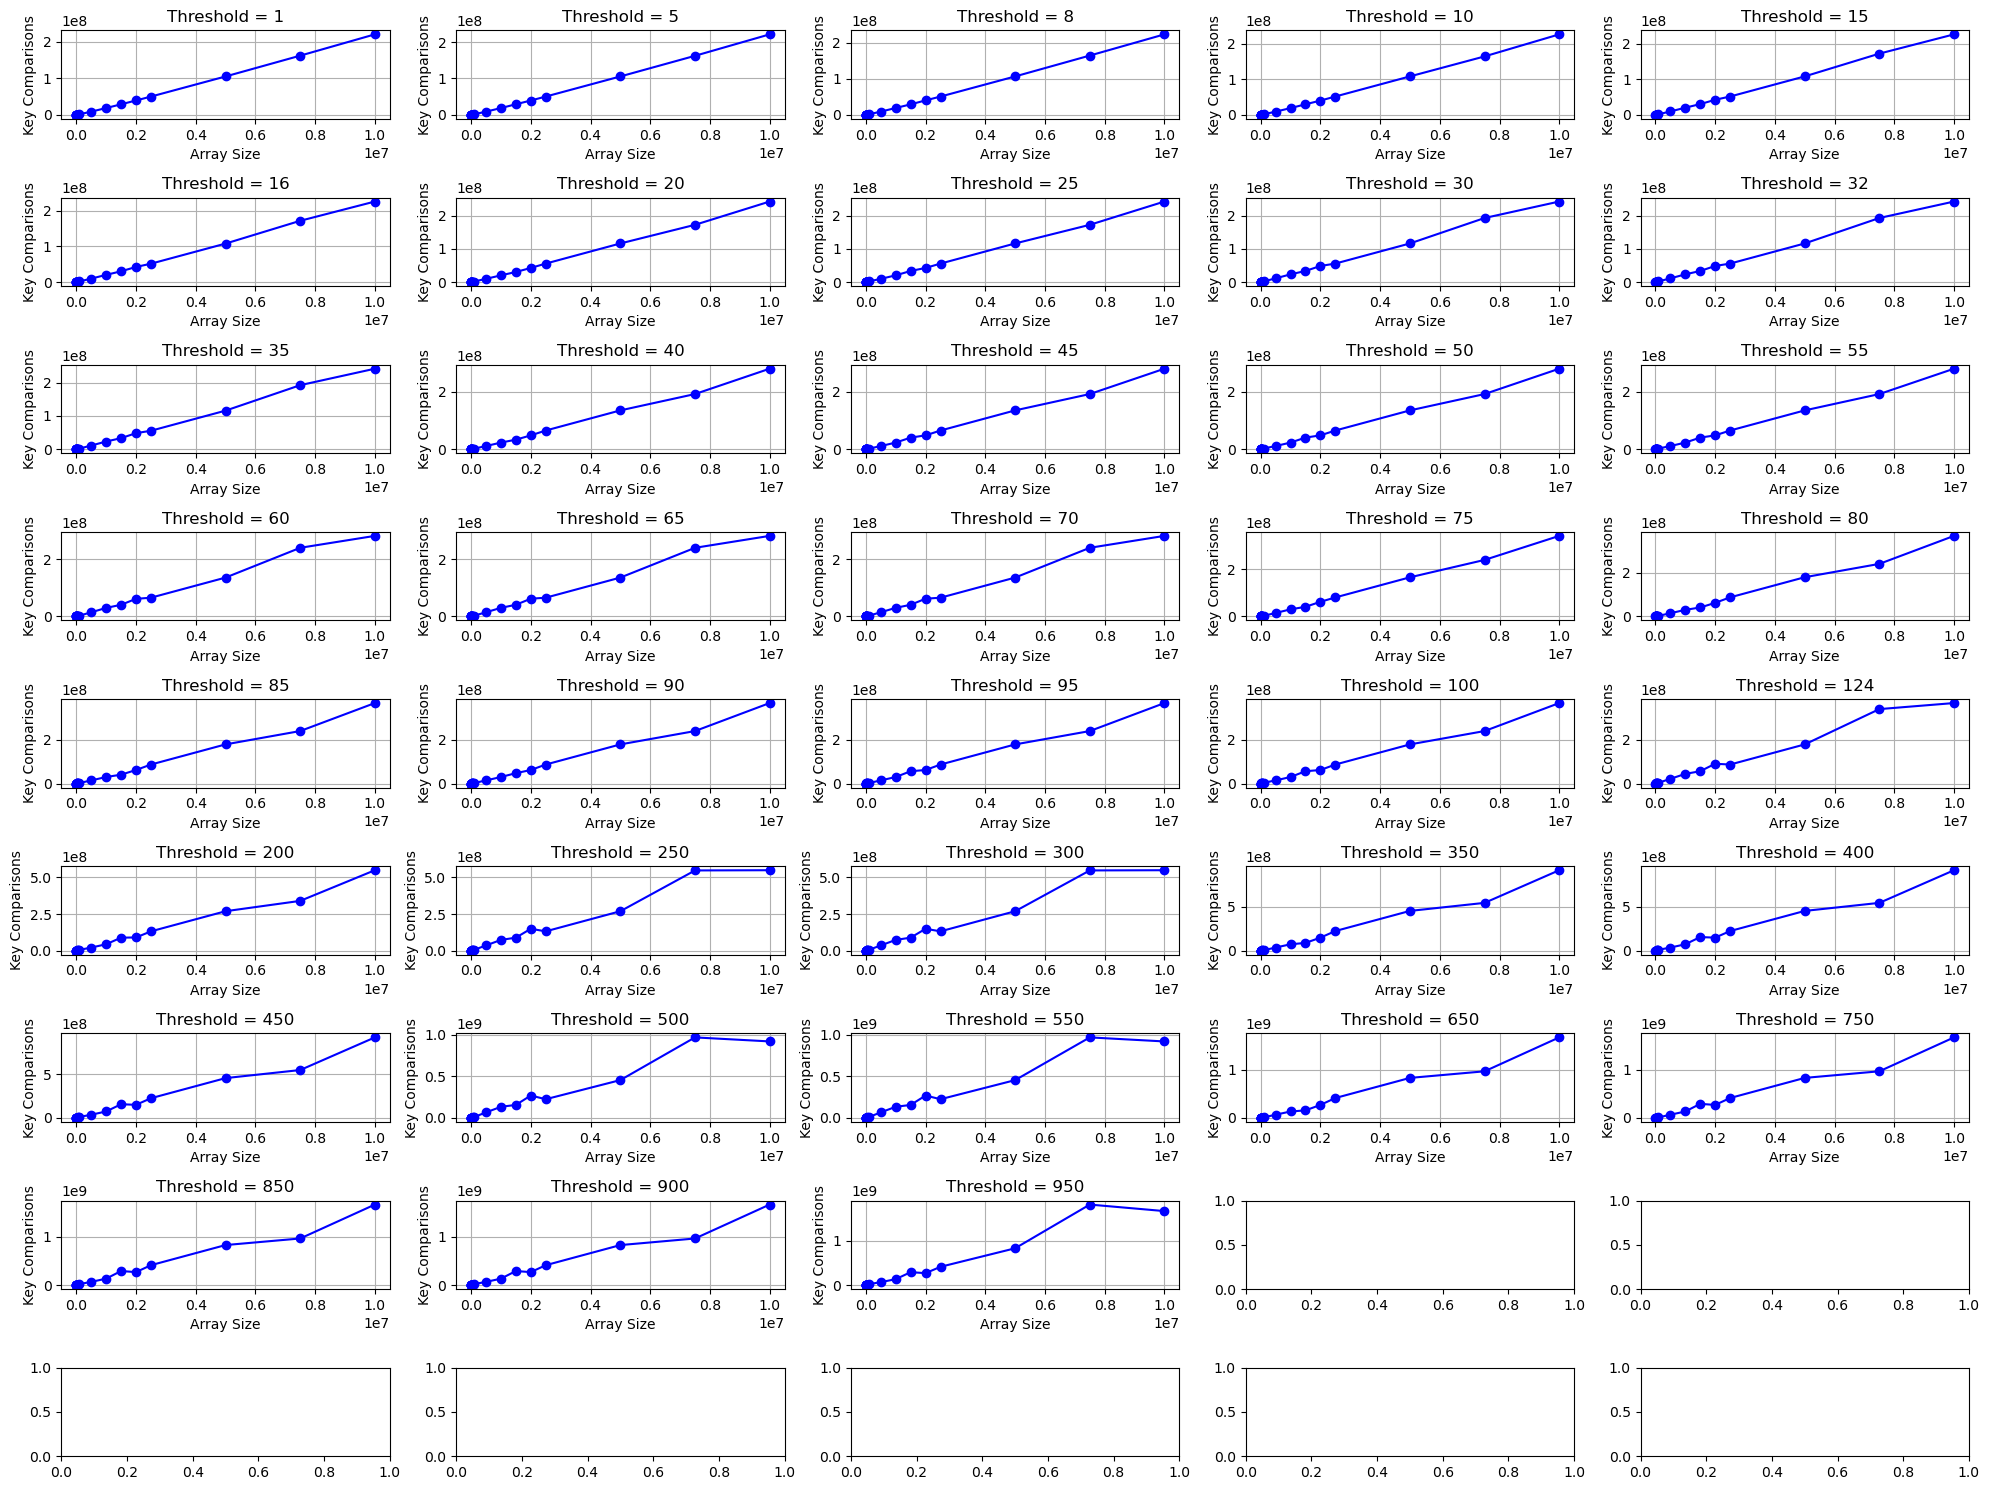

In [7]:
#1. Combined graph
plt.figure(figsize=(10, 6))

# Group the data by threshold and plot each group
for Threshold, group in hybrid_df.groupby('Threshold'):
    plt.plot(group['Array Size'], group['Comparisons'], marker='o', label=f'{Threshold}')

plt.title('Key Comparisons vs Array Size for Different Thresholds (Hybrid Mergesort)')
plt.xlabel('Array Size')
plt.ylabel('Comparisons')
plt.legend(title="Threshold")
plt.grid(True)
plt.xscale('log')  # Logarithmic scale for array size if necessary
plt.yscale('log')  # Logarithmic scale for key comparisons if necessary
plt.show()

#2. Separate graph
fig, axes = plt.subplots(9,5, figsize=(20,15)) 
axes = axes.flatten()

unique_thresholds = hybrid_df['Threshold'].unique()
for i, Threshold in enumerate(unique_thresholds):
    df_threshold = hybrid_df[hybrid_df['Threshold'] == Threshold]
    
    axes[i].plot(df_threshold['Array Size'], df_threshold['Comparisons'], marker='o', linestyle='-', color='b')

    axes[i].set_title(f'Threshold = {Threshold}')
    axes[i].set_xlabel('Array Size')
    axes[i].set_ylabel('Key Comparisons')
    axes[i].grid(True)
    #axes[i].set_xscale('log')  # Logarithmic scale for array size
    #axes[i].set_yscale('log')  # Logarithmic scale for key comparisons

plt.tight_layout()
plt.show()

Empirical vs Theoretical 

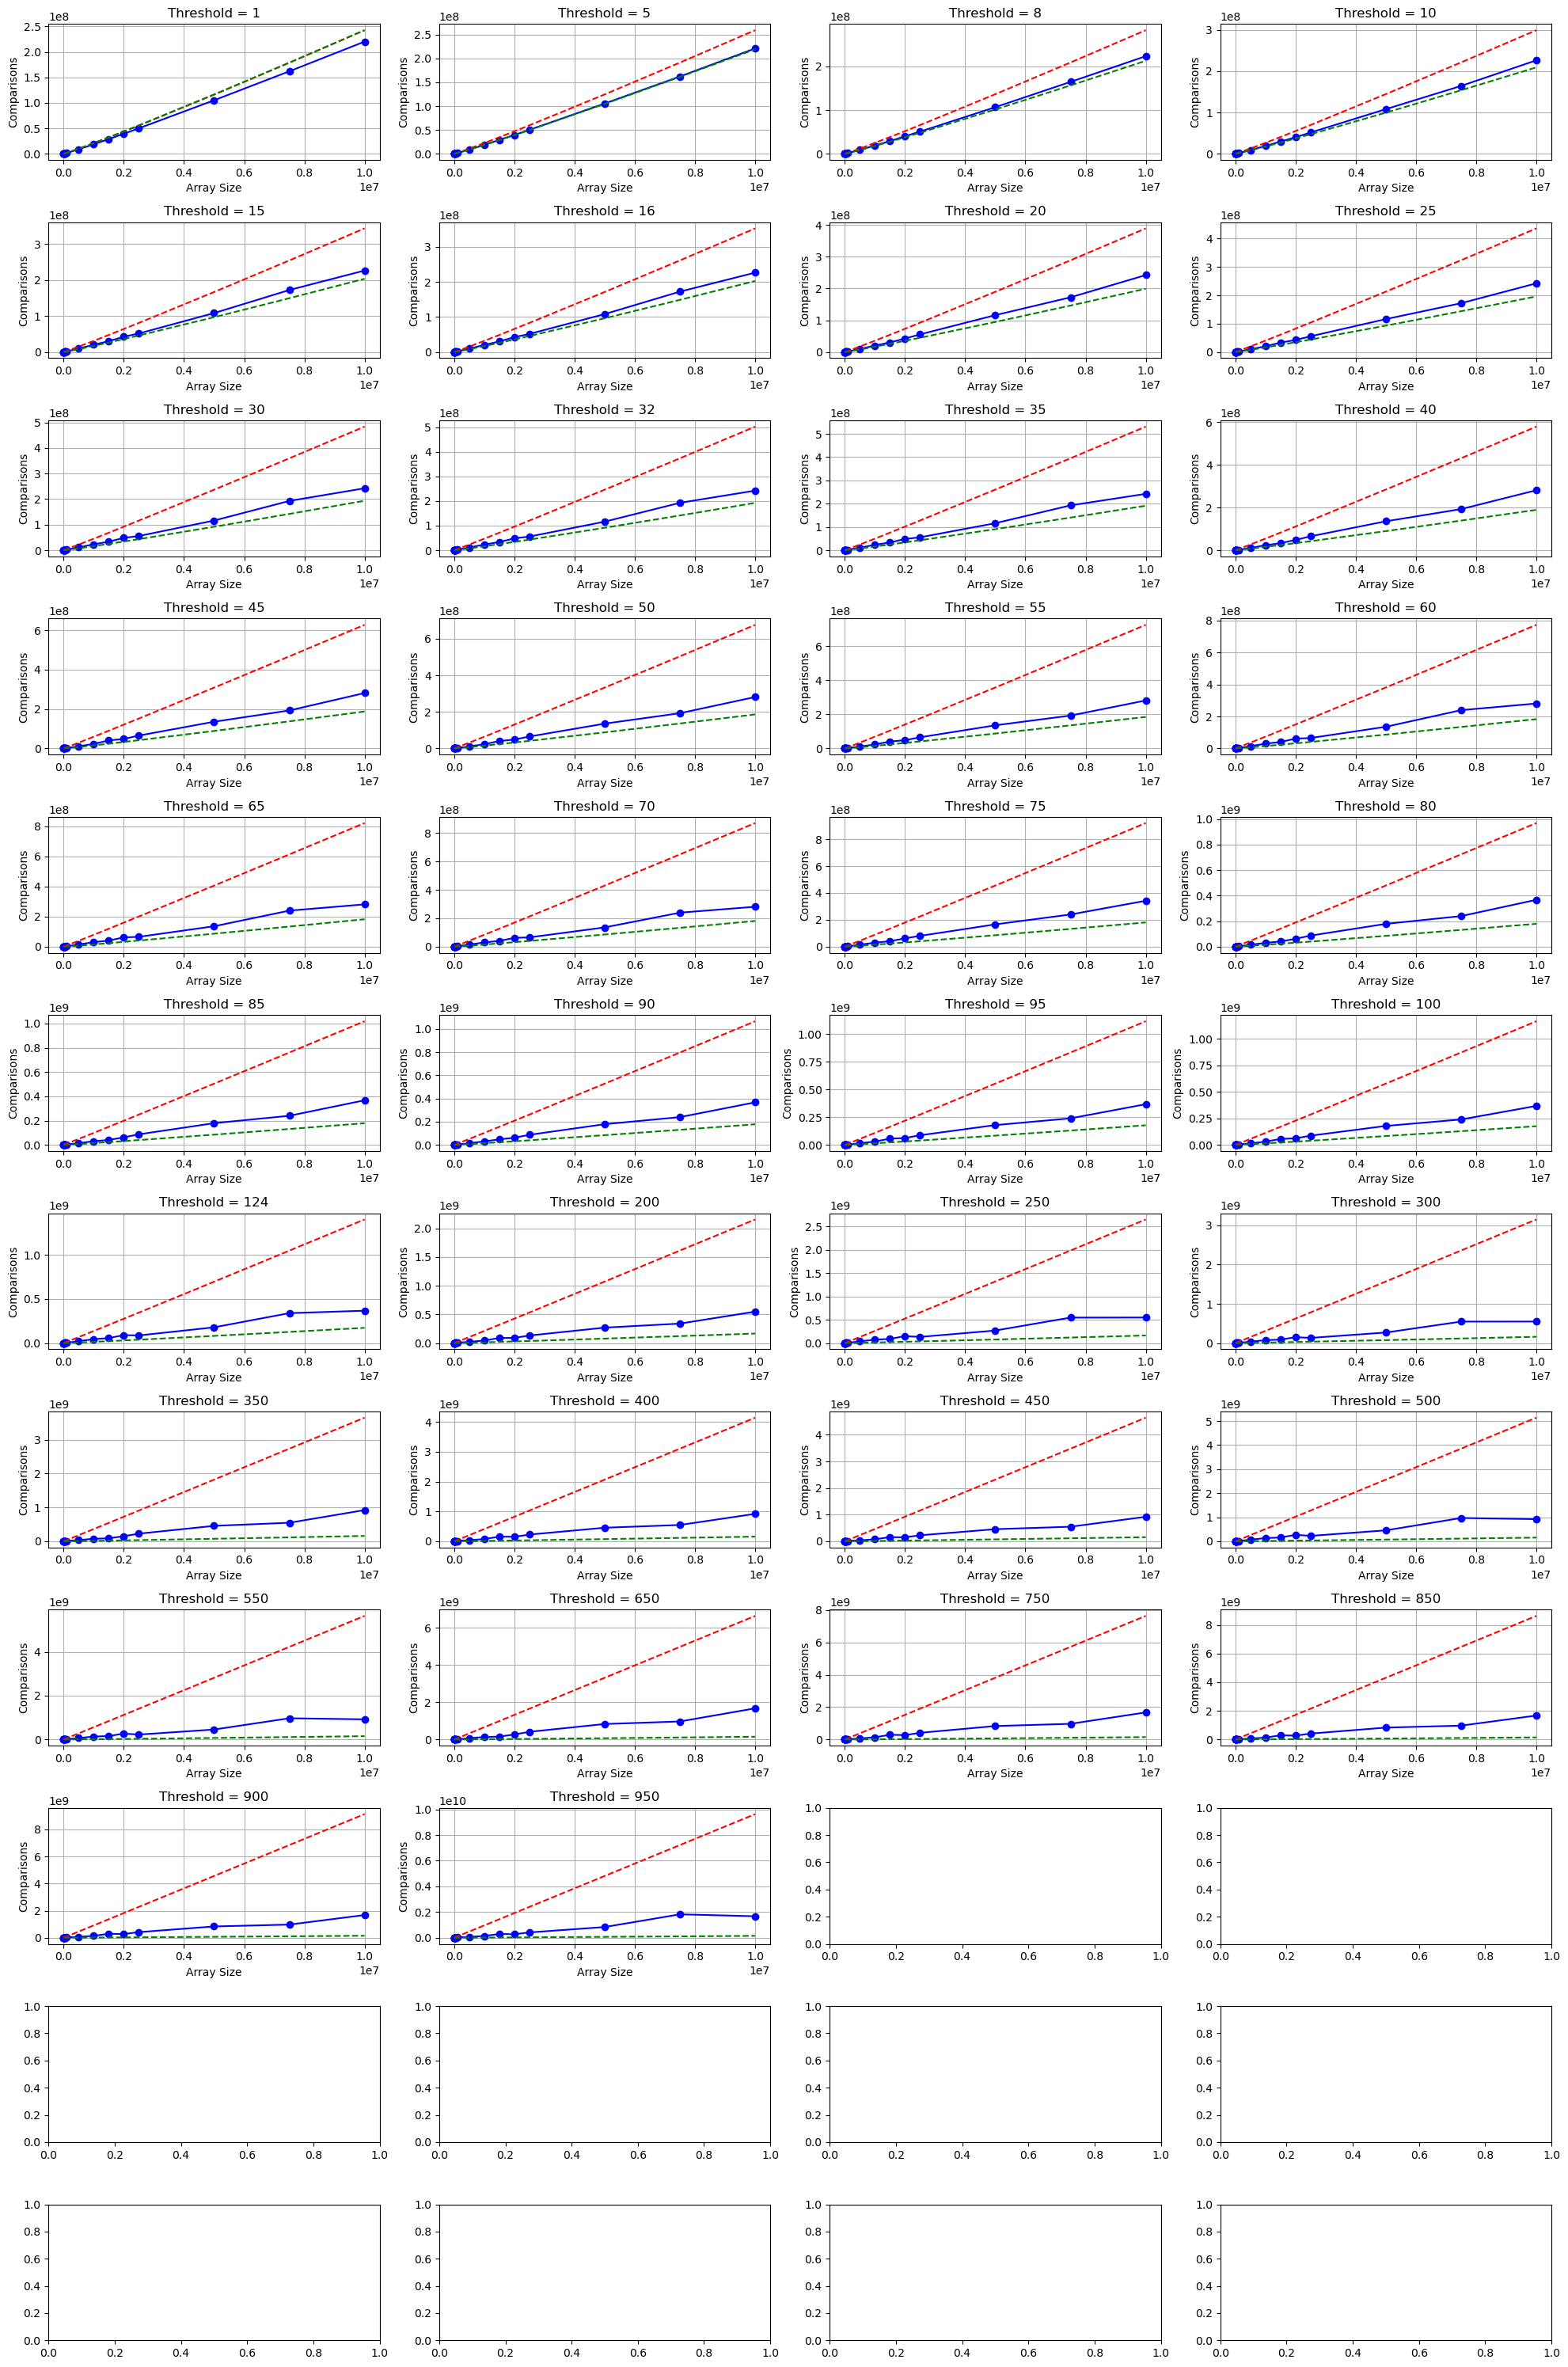

In [46]:
unique_array_sizes = hybrid_df['Array Size'].unique()

fig, axes = plt.subplots(12,4, figsize=(20,30)) 
axes = axes.flatten()

unique_thresholds = hybrid_df['Threshold'].unique()
for i, Threshold in enumerate(unique_thresholds):
    df_threshold = hybrid_df[hybrid_df['Threshold'] == Threshold]
    n = df_threshold['Array Size']
    s = Threshold
    theoretical_values = (n*s) + n*np.log2(n/s)
    theoretical_values_bestCase = n + n*np.log2(n/s)
    
    axes[i].plot(df_threshold['Array Size'], df_threshold['Comparisons'], marker='o', linestyle='-', color='b')
    axes[i].plot(n, theoretical_values, label="Theoretical Worst", linestyle="--", color="red")
    axes[i].plot(n, theoretical_values_bestCase, label="Theoretical Best", linestyle="--", color="green")

    axes[i].set_title(f'Threshold = {Threshold}')
    axes[i].set_xlabel('Array Size')
    axes[i].set_ylabel('Comparisons')
    axes[i].grid(True)
    #axes[i].set_xscale('log')  # Logarithmic scale for array size
    #axes[i].set_yscale('log')  # Logarithmic scale for key comparisons

plt.tight_layout()
plt.show()

## Zoomed for threshold = 45

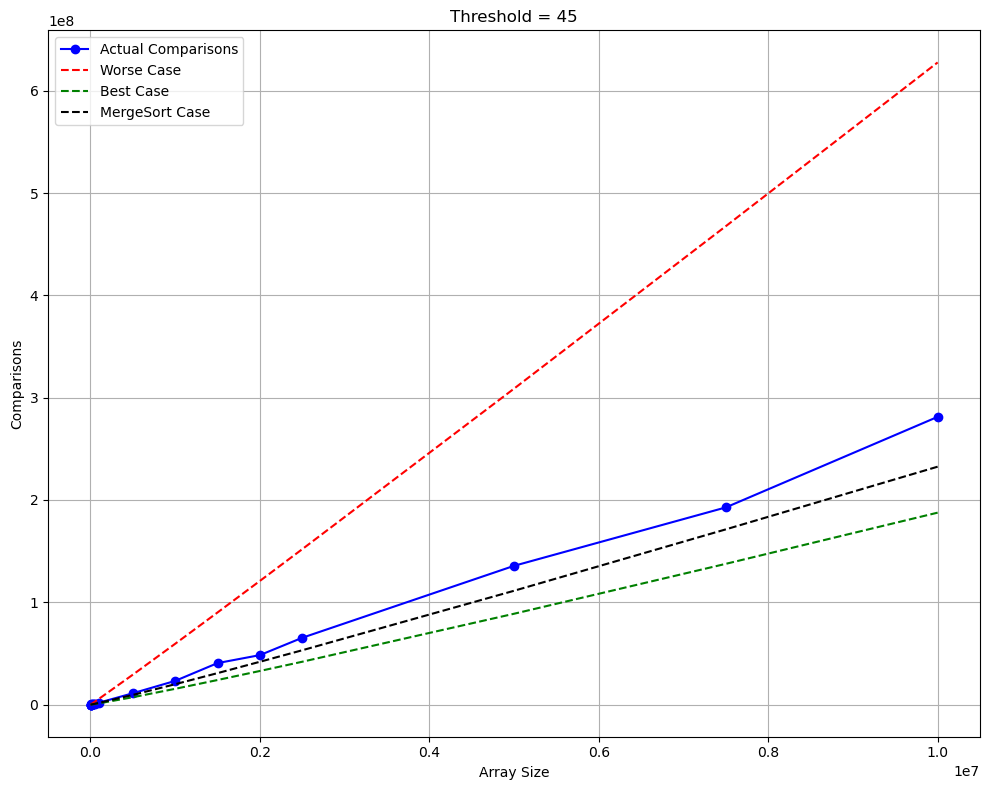

In [11]:
unique_array_sizes = hybrid_df['Array Size'].unique()

fig, ax = plt.subplots(figsize=(10,8))  # Single plot for Threshold = 45

# Filter the data for threshold = 45
threshold_value = 45
df_threshold = hybrid_df[hybrid_df['Threshold'] == threshold_value]

# Get the array sizes and calculate theoretical values
n = df_threshold['Array Size']
s = threshold_value
theoretical_values = (n * s) + n * np.log2(n / s)
theoretical_values_bestCase = n + n * np.log2(n / s)
theoretical_values_merge =  n * np.log2(n)
theoretical_values_insertion =  n*n

# Plot the actual comparisons and theoretical values
ax.plot(df_threshold['Array Size'], df_threshold['Comparisons'], marker='o', linestyle='-', color='b', label='Actual Comparisons')
ax.plot(n, theoretical_values, label="Worse Case", linestyle="--", color="red")
ax.plot(n, theoretical_values_bestCase, label="Best Case", linestyle="--", color="green")
ax.plot(n, theoretical_values_merge, label="MergeSort Case", linestyle="--", color="black")
# ax.plot(n, theoretical_values_insertion, label="Insertion Sort Case", linestyle="--", color="purple")

# Set title, labels, and grid
ax.set_title(f'Threshold = {threshold_value}')
ax.set_xlabel('Array Size')
ax.set_ylabel('Comparisons')
ax.grid(True)

# Optionally, you can use logarithmic scales
# ax.set_xscale('log')  
# ax.set_yscale('log')

ax.legend()
plt.tight_layout()
plt.show()


## Key takeaways
- The number of comparisons for HybridMergeSort (green line) is consistently higher than MergeSort (blue line) across all array sizes.
- This difference becomes more significant as the array size increases, it might be that HybridMergeSort performs more comparisons due to switching to insertion sort for small segments.
- This isn't leading to much better performance for large arrays.

## cii. (Fixed Array Size) Key Comparisons vs Threshold

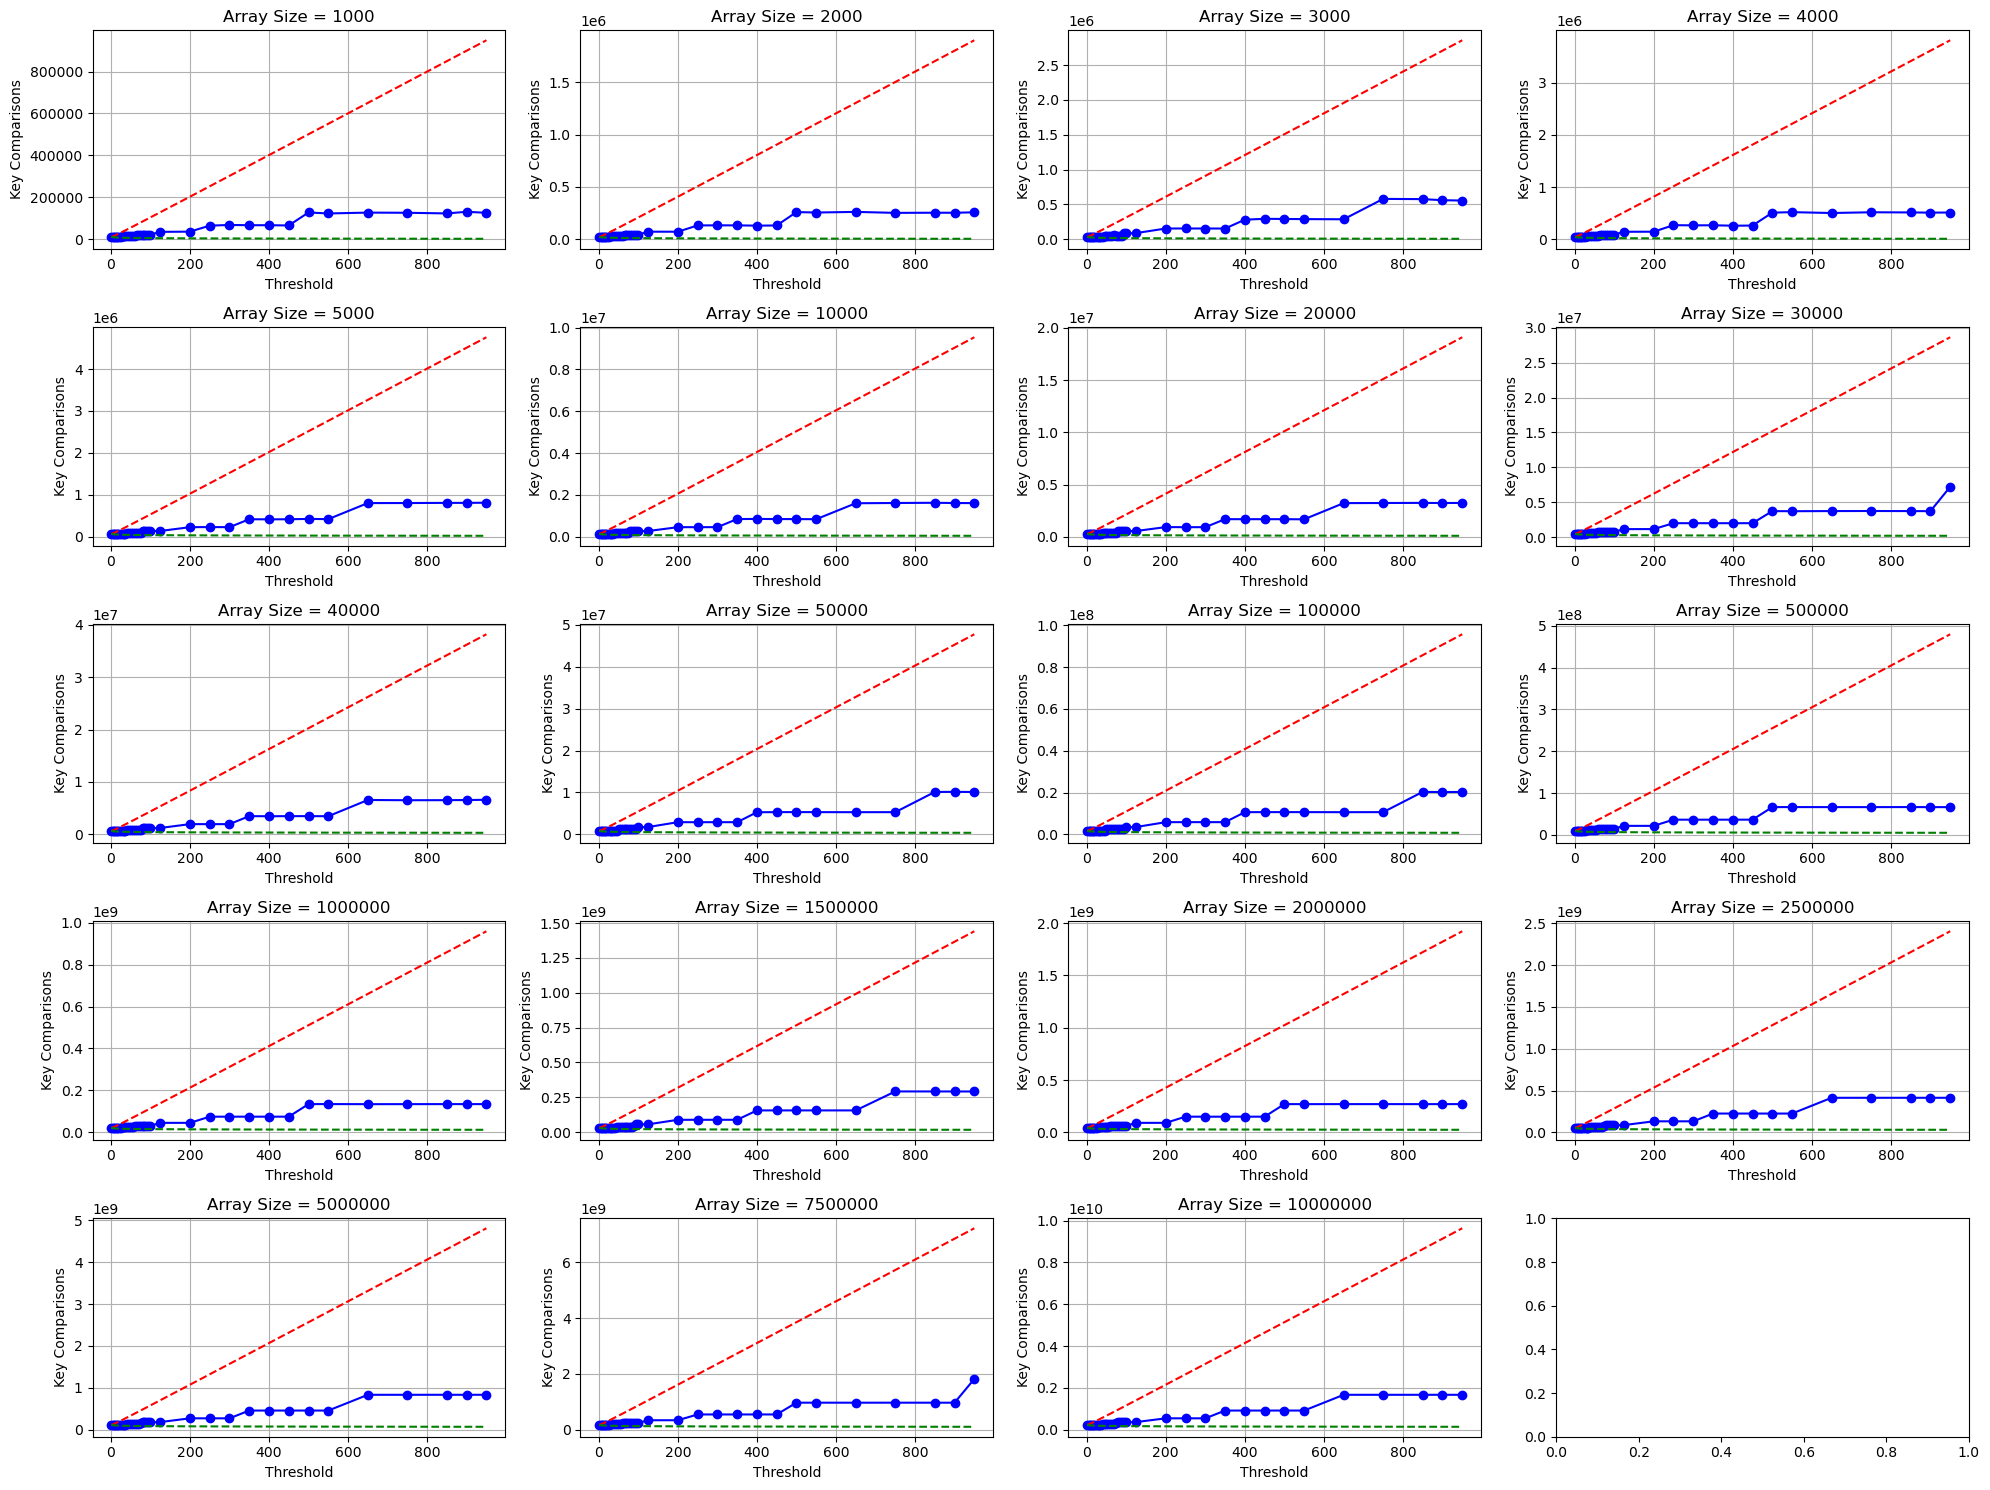

In [14]:
unique_array_sizes = hybrid_df['Array Size'].unique()

num_plots = len(unique_array_sizes)
fig, axes = plt.subplots((num_plots + 3) // 4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, array_size in enumerate(unique_array_sizes):
    df_size = hybrid_df[hybrid_df['Array Size'] == array_size]
    
    # Plot the smoothed Key Comparisons vs Threshold on the corresponding subplot
    '''
    x_new = np.linspace(df_size['Threshold'].min(), df_size['Threshold'].max(), 300)
    spl = make_interp_spline(df_size['Threshold'], df_size['Comparisons'], k=3)  # k=3 for cubic spline
    y_smooth = spl(x_new)
    axes[i].plot(x_new, y_smooth, marker='', linestyle='-', color='b')
    '''
    # Plot Key Comparisons vs Threshold on the corresponding subplot
    axes[i].plot(df_size['Threshold'], df_size['Comparisons'], marker='o', linestyle='-', color='b')
    
    n = array_size
    s = df_size['Threshold']
    theoretical_values_worst = n*s + n*np.log2(n/s)
    theoretical_values_best = n + n*np.log2(n/s)
    
    axes[i].plot(s, theoretical_values_worst, label="TheoreticalWorst", linestyle="--", color="red")
    axes[i].plot(s, theoretical_values_best, label="TheoreticalBest", linestyle="--", color="green")
    
    # Customize each subplot
    axes[i].set_title(f'Array Size = {array_size}')
    axes[i].set_xlabel('Threshold')
    axes[i].set_ylabel('Key Comparisons')
    axes[i].grid(True)
    #axes[i].set_yscale('log')  # Logarithmic scale for key comparisons if necessary

# Adjust layout so that titles and labels don't overlap
plt.tight_layout()

plt.show()

## Zoomed in for array size 10 mil

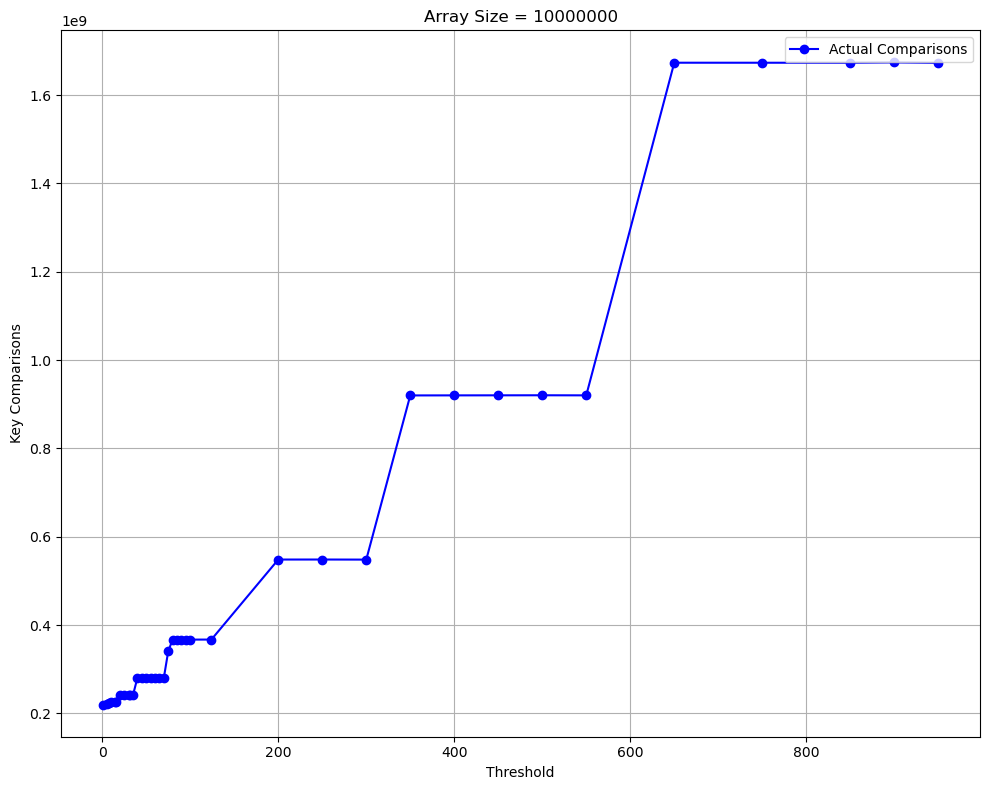

In [16]:
# Filter the data for array size of 10 million
array_size_10mil = 10_000_000
df_size = hybrid_df[hybrid_df['Array Size'] == array_size_10mil]

# Create a single plot for the 10 million array size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot Key Comparisons vs Threshold
ax.plot(df_size['Threshold'], df_size['Comparisons'], marker='o', linestyle='-', color='b', label='Actual Comparisons')

# Calculate theoretical values for worst and best case scenarios
n = array_size_10mil
s = df_size['Threshold']
theoretical_values_worst = n * s + n * np.log2(n / s)
theoretical_values_best = n + n * np.log2(n / s)

# # Plot theoretical worst and best case comparisons
# ax.plot(s, theoretical_values_worst, label="Theoretical Worst", linestyle="--", color="red")
# ax.plot(s, theoretical_values_best, label="Theoretical Best", linestyle="--", color="green")

# Customize the plot
ax.set_title(f'Array Size = {array_size_10mil}')
ax.set_xlabel('Threshold')
ax.set_ylabel('Key Comparisons')
ax.grid(True)

# Optional: Use logarithmic scale if necessary
# ax.set_yscale('log')

# Add a legend
ax.legend()

# Adjust layout
plt.tight_layout()

plt.show()


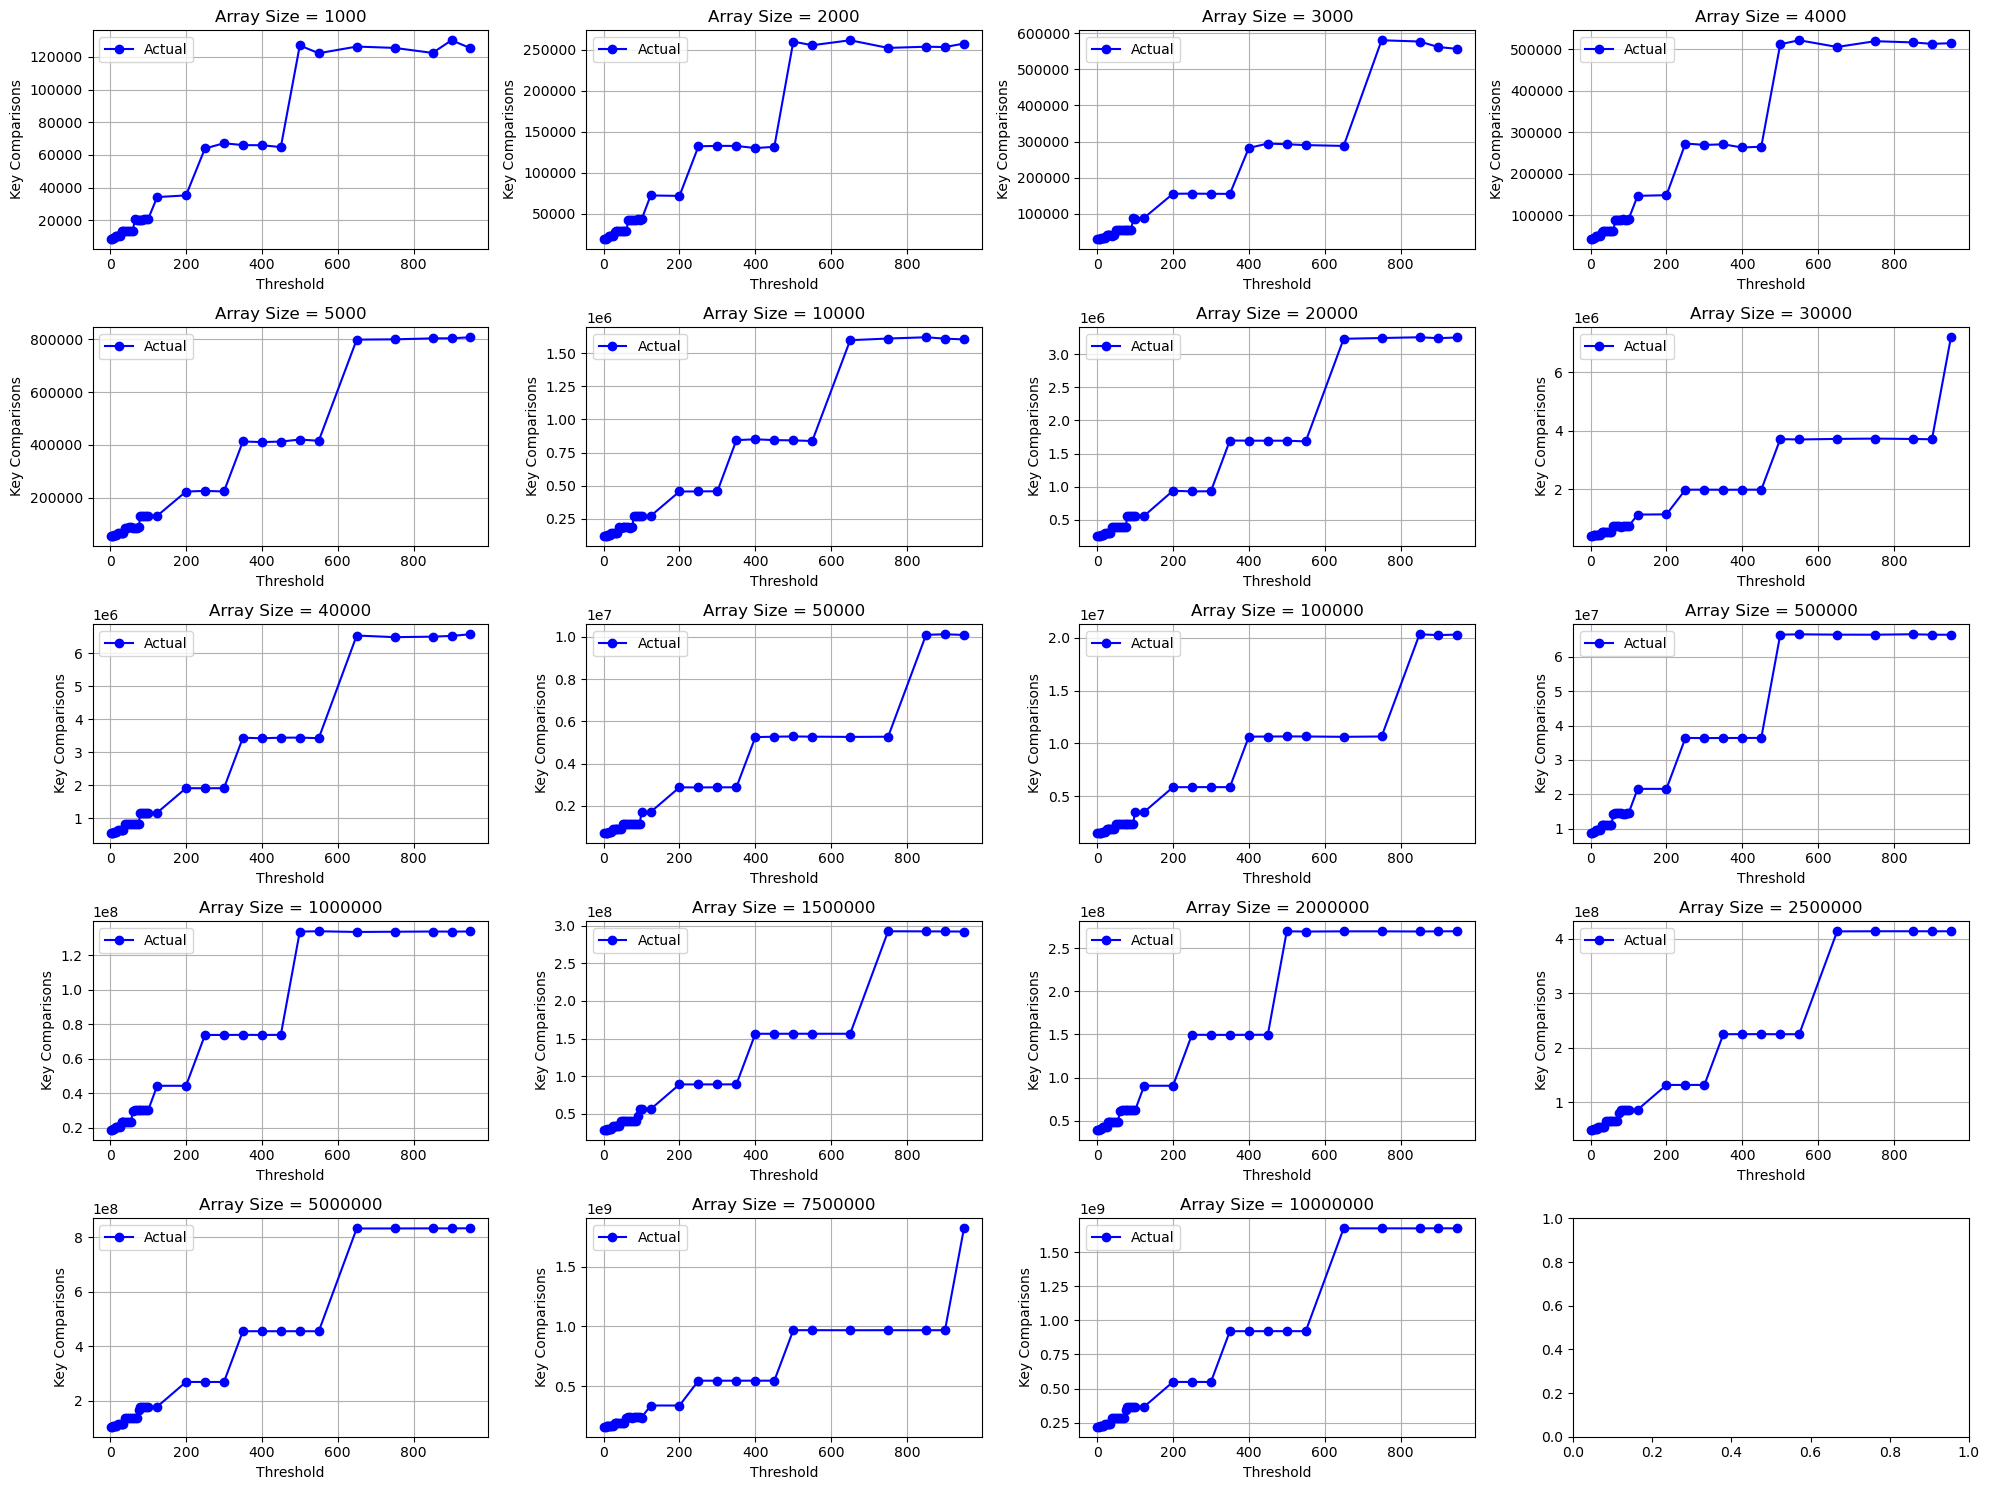

In [17]:
import numpy as np
import matplotlib.pyplot as plt

unique_array_sizes = hybrid_df['Array Size'].unique()
num_plots = len(unique_array_sizes)
fig, axes = plt.subplots((num_plots + 3) // 4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, array_size in enumerate(unique_array_sizes):
    df_size = hybrid_df[hybrid_df['Array Size'] == array_size]
    
    # Plot Key Comparisons vs Threshold on the corresponding subplot
    axes[i].plot(df_size['Threshold'], df_size['Comparisons'], marker='o', linestyle='-', color='b', label='Actual')
    
    # Customize each subplot
    axes[i].set_title(f'Array Size = {array_size}')
    axes[i].set_xlabel('Threshold')
    axes[i].set_ylabel('Key Comparisons')
    axes[i].grid(True)
    axes[i].legend()

# Adjust layout so that titles and labels don't overlap
plt.tight_layout()
plt.show()


## Key takeaways
- Small Thresholds: HybridMergeSort uses Merge Sort more extensively.
- Large Thresholds: HybridMergeSort switches to using Insertion Sort more often.
- As the threshold increases, more and more subarrays are passed to Insertion Sort O(n^2), the number of comparisons increases because larger subarrays are being handled by Insertion Sort, which is less efficient for large datasets.
- 

## ciii. (Fixed Array Size) Time Complexity vs Threshold

Array Size = 1000: Most Efficient Threshold = 1, Time = 0 ms
Array Size = 2000: Most Efficient Threshold = 1, Time = 0 ms
Array Size = 3000: Most Efficient Threshold = 5, Time = 0 ms
Array Size = 4000: Most Efficient Threshold = 10, Time = 0 ms
Array Size = 5000: Most Efficient Threshold = 10, Time = 0 ms
Array Size = 10000: Most Efficient Threshold = 15, Time = 0 ms
Array Size = 20000: Most Efficient Threshold = 5, Time = 2 ms
Array Size = 30000: Most Efficient Threshold = 40, Time = 3 ms
Array Size = 40000: Most Efficient Threshold = 30, Time = 4 ms
Array Size = 50000: Most Efficient Threshold = 70, Time = 5 ms
Array Size = 100000: Most Efficient Threshold = 30, Time = 10 ms
Array Size = 500000: Most Efficient Threshold = 50, Time = 65 ms
Array Size = 1000000: Most Efficient Threshold = 35, Time = 148 ms
Array Size = 1500000: Most Efficient Threshold = 35, Time = 221 ms
Array Size = 2000000: Most Efficient Threshold = 30, Time = 312 ms
Array Size = 2500000: Most Efficient Threshold =

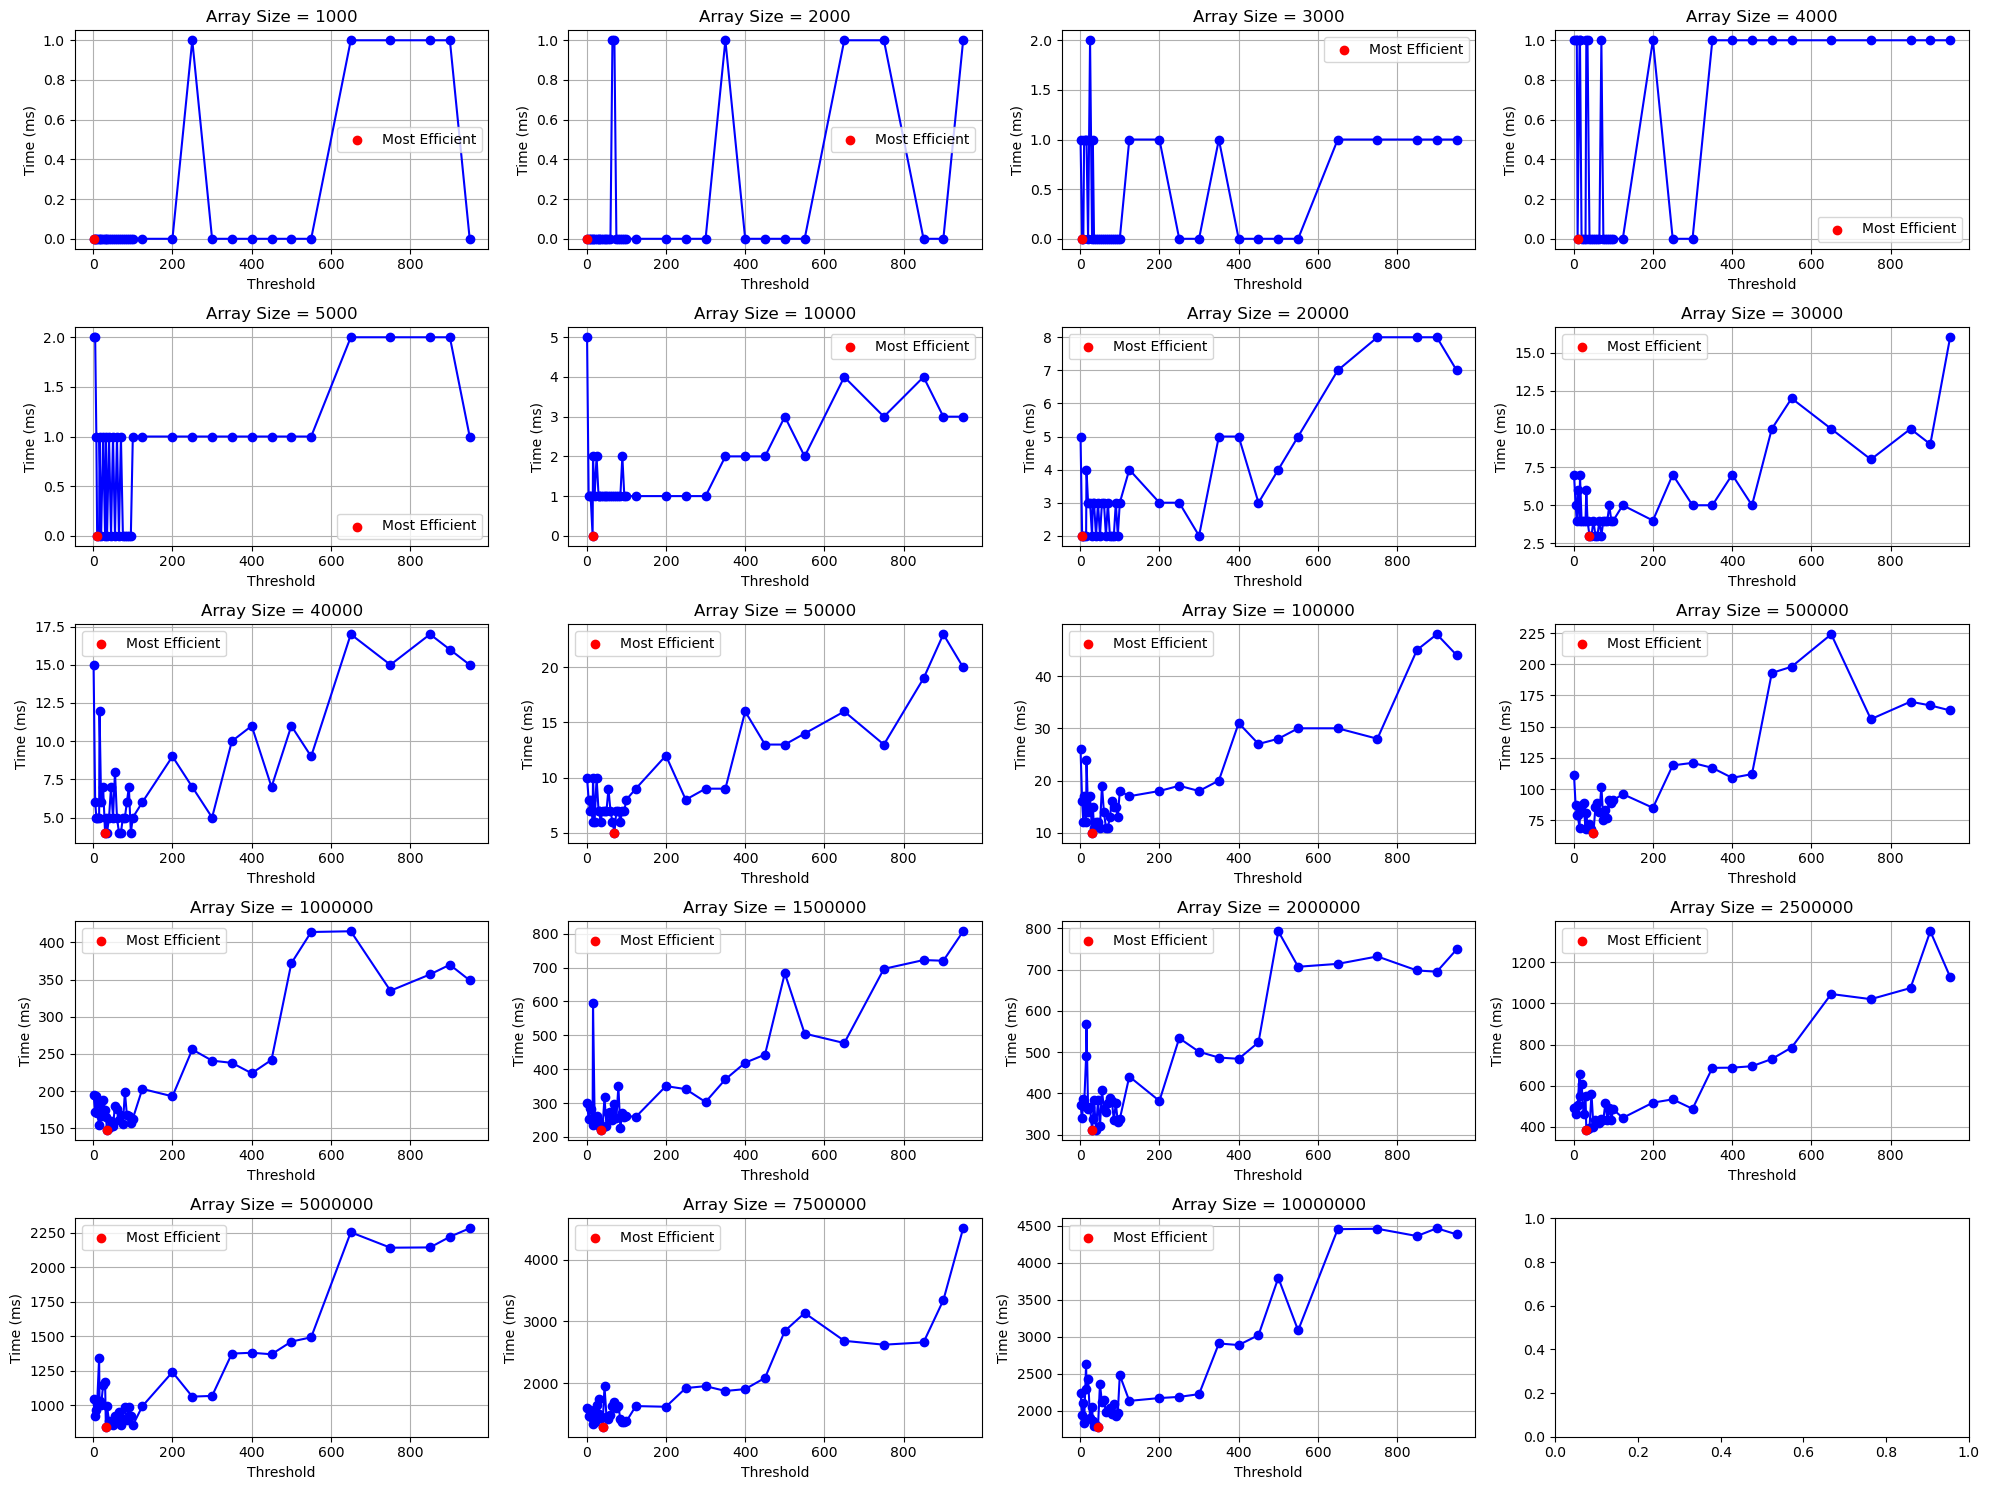

In [20]:
num_plots = len(unique_array_sizes)
fig, axes = plt.subplots((num_plots + 3) // 4, 4, figsize=(20, 15))
axes = axes.flatten()

# Loop through each unique array size
for i, array_size in enumerate(unique_array_sizes):
    df_size = hybrid_df[hybrid_df['Array Size'] == array_size]
    
    # Find the index of the minimum Time (ms)
    min_time_index = df_size['Time (ms)'].idxmin()
    
    # Get the corresponding Threshold and Time (ms) values for the most efficient point
    most_efficient_threshold = df_size.loc[min_time_index, 'Threshold']
    most_efficient_time = df_size.loc[min_time_index, 'Time (ms)']
    
    # Print out the most efficient point for each array size
    print(f"Array Size = {array_size}: Most Efficient Threshold = {most_efficient_threshold}, Time = {most_efficient_time} ms")
    
    # Plot Time vs Threshold on the corresponding subplot
    axes[i].plot(df_size['Threshold'], df_size['Time (ms)'], marker='o', linestyle='-', color='b')
    
    # Highlight the most efficient point on the plot
    axes[i].scatter(most_efficient_threshold, most_efficient_time, color='r', label='Most Efficient', zorder=5)
    
    # Customize each subplot
    axes[i].set_title(f'Array Size = {array_size}')
    axes[i].set_xlabel('Threshold')
    axes[i].set_ylabel('Time (ms)')
    axes[i].grid(True)
    axes[i].legend()  # Add a legend to highlight the most efficient point

plt.tight_layout()
plt.show()


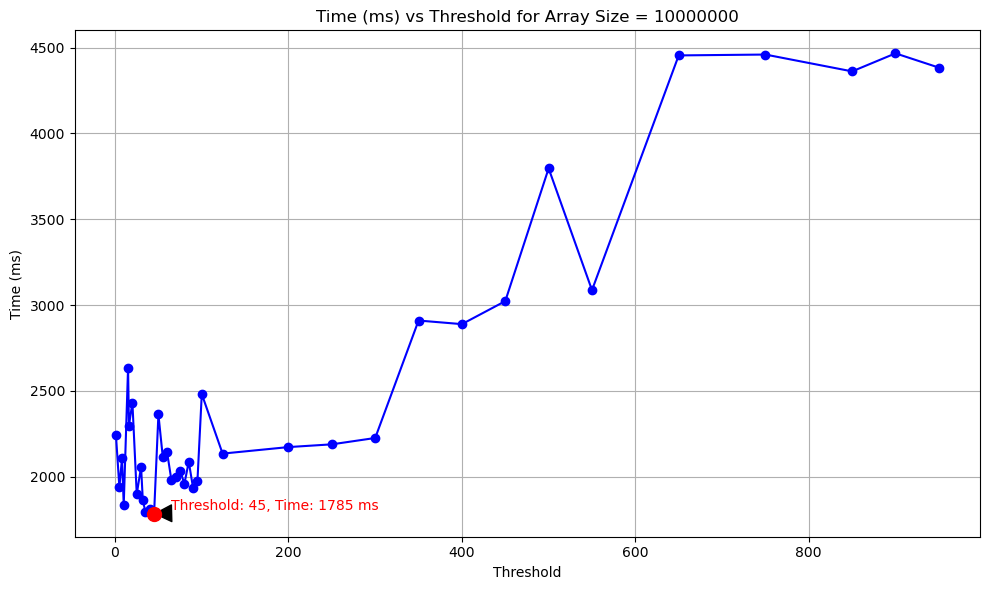

In [21]:
fixed_array_size = 10_000_000
df_filtered = hybrid_df[hybrid_df['Array Size'] == fixed_array_size]

plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(df_filtered['Threshold'], df_filtered['Time (ms)'], marker='o', linestyle='-', color='b')

# Find the lowest point
min_time = df_filtered['Time (ms)'].min()
min_threshold = df_filtered[df_filtered['Time (ms)'] == min_time]['Threshold'].values[0]

# Highlight the lowest point
plt.scatter(min_threshold, min_time, color='red', s=100, zorder=5)

# Annotate the lowest point with both Time and Threshold
plt.annotate(f'Threshold: {min_threshold}, Time: {min_time} ms', 
             xy=(min_threshold, min_time), 
             xytext=(min_threshold + 20, min_time + 20),  # Adjust text position
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, color='red')

# Add a title and labels
plt.title(f'Time (ms) vs Threshold for Array Size = {fixed_array_size}')
plt.xlabel('Threshold')
plt.ylabel('Time (ms)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [22]:
lowest_point = df_filtered.loc[df_filtered['Time (ms)'].idxmin()]

lowest_threshold = lowest_point['Threshold']
lowest_time = lowest_point['Time (ms)']

print(f"The lowest point occurs at Threshold = {lowest_threshold} with Time = {lowest_time} ms")

The lowest point occurs at Threshold = 45 with Time = 1785 ms


For Array Size = 10mil, we identified that the time efficiency is highest when threshold = 45, which is optimal.
Therefore, we will use this threshold to compare the performance of hibrid merge sort with the original merge sort in the next section.

## 4. Compare with original MergeSort
Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above
hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with <b>10 million integers</b>.

In [25]:
fixed_array_size = 10000000
fixed_threshold = 124
df_filtered = df[(df['Array Size'] == fixed_array_size) & (df['Threshold'] == fixed_threshold)]

df_filtered

,Threshold,Array Size,Algorithm,Time (ms),Comparisons,IsSorted
948,124,10000000,MergeSort,2442,220097569,True
949,124,10000000,HybridMergeSort,2135,367366892,True


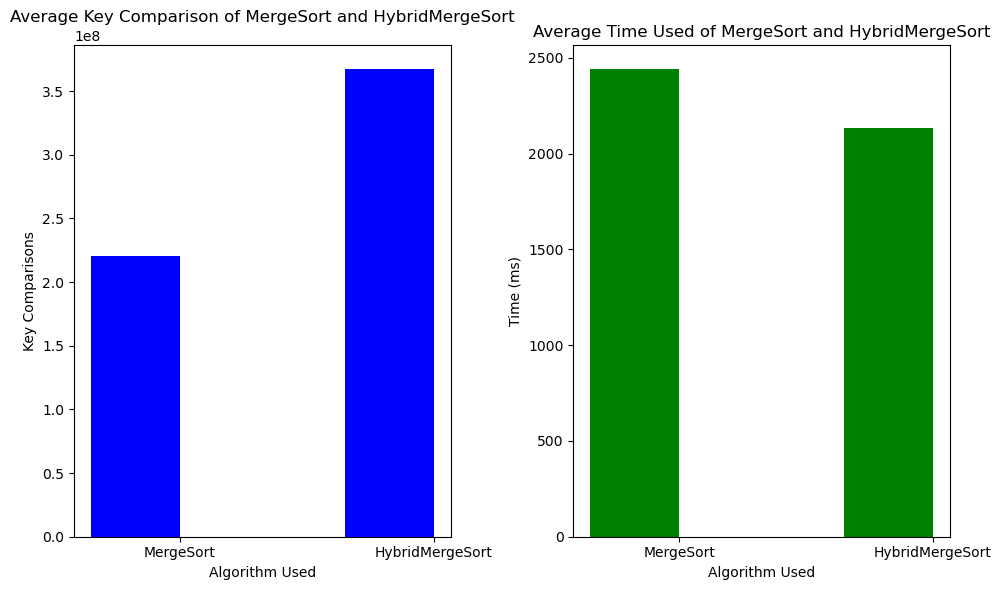

In [26]:
categories = ['MergeSort','HybridMergeSort']
comparisons = [220097569,367366892]
time = [2442,2135]

bar_width = 0.35
index = np.arange(len(categories))

#Plot graph for key comparisons
fig, ax = plt.subplots(1,2,figsize=(10,6))
comparison_bar = ax[0].bar(index, comparisons, bar_width, color='b')
ax[0].set_xlabel('Algorithm Used')
ax[0].set_ylabel('Key Comparisons')
ax[0].set_title('Average Key Comparison of MergeSort and HybridMergeSort')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(categories)

#Plot graph for time taken
time_bar = ax[1].bar(index, time, bar_width, color='g')
ax[1].set_xlabel('Algorithm Used')
ax[1].set_ylabel('Time (ms)')
ax[1].set_title('Average Time Used of MergeSort and HybridMergeSort')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(categories)

plt.tight_layout()
plt.show()

In [27]:
print((comparisons[1]-comparisons[0])/comparisons[0]*100)
print((time[0]-time[1])/time[0]*100)

66.910926671798
12.571662571662573
